# Project: Investigate a Dataset - TMDb Movie Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains 10000 movies for The Movie Database (TMDb), including user ratings and revenue.
### Dataset Description
Some of the fields (not all) in the dataset are as follows:

- **budget**: Budget of a movie.
- **genres**: All genres to which a movie belongs, store in JSON format with two properties 'id' and 'name'.
- **polularity**: Popularity of a movie in float.
- **release_date**: Release date of a movie (in format mm/dd/yyyy).
- **runtime**: Runtime of a movie on minutes.
- **vote_count**: vote count of a movie.
- **revenue**: revenue earned by a movie.
>**Tip** In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. For more detail about dataset please find [here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
### Questions
1. What are the top 10 highest revenue-generating movies?
2. What genre have the highest number of movies released?
3. How does the number of movies released change over time?
4. What properties (such as: budget, runtime, polularity) are associated with movies that have highest revenue?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import json

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
#check duplicated rows
df.duplicated().sum()

0

In [5]:
#remove unuse columns
df.drop(['id'],axis=1,inplace=True)

In [6]:
#Changing release_date format into datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exporatory Data Analysis

### What are the top 10 highest revenue-generating movies?

C:\Users\QuangLNT\AppData\Local\Temp\ipykernel_17592\3223446295.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  top_10_movies.mean()
C:\Users\QuangLNT\AppData\Local\Temp\ipykernel_17592\3223446295.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_10_movies.mean()


budget          1.951000e+08
popularity      2.366983e+02
revenue         1.537743e+09
runtime         1.371000e+02
vote_average    7.080000e+00
vote_count      7.665600e+03
dtype: float64

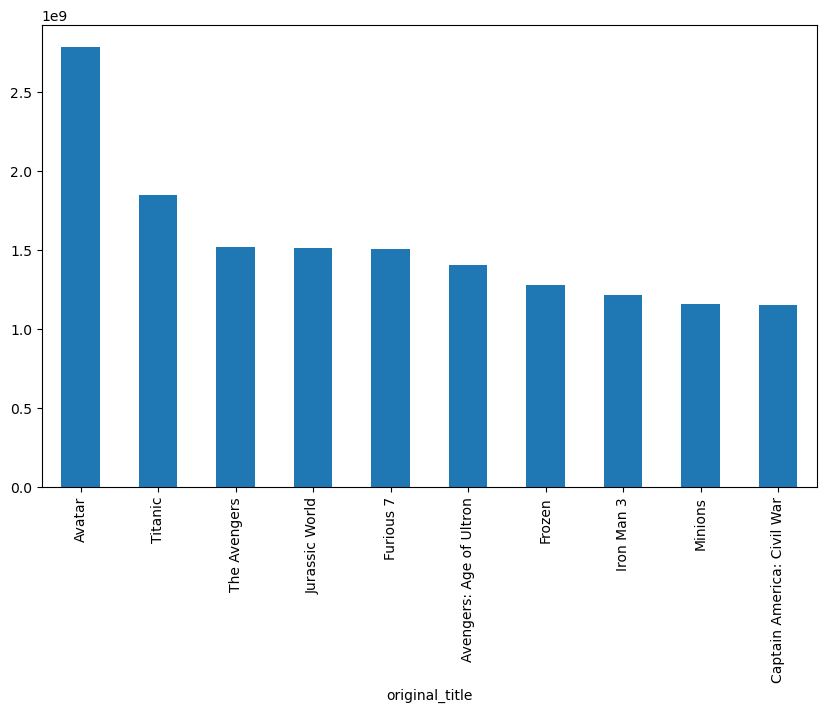

In [7]:
df = df.sort_values(by='revenue', ascending=False)
top_10_movies = df.head(10)
top_10_movies.set_index('original_title', inplace=True)
top_10_movies['revenue'].plot(kind='bar',figsize=(10, 6), legend=False);
top_10_movies.mean()

### What genre have the highest number of movies released?

In [8]:
#Explode dataframe by genres
df['genres'] = df['genres'].apply(json.loads)
df = df.explode('genres')

In [9]:
#Get genres name only
df['genres'] = df['genres'].apply(lambda x : x['name'] if isinstance(x,dict) and 'name' in x else '')
df['genres'].fillna('')
df.head(2)


,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,Action,http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
0,237000000,Adventure,http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


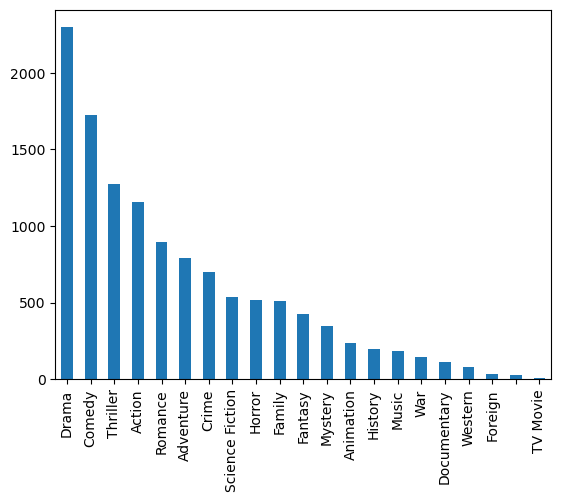

In [10]:
# Draw chart
df['genres'].value_counts().plot(kind='bar');

### How does the number of movies released change over time?
                

In [11]:
df['year'] = df['release_date'].dt.year
df.dropna(subset=['year'], inplace=True)
df['year'] = df['year'].astype(int)

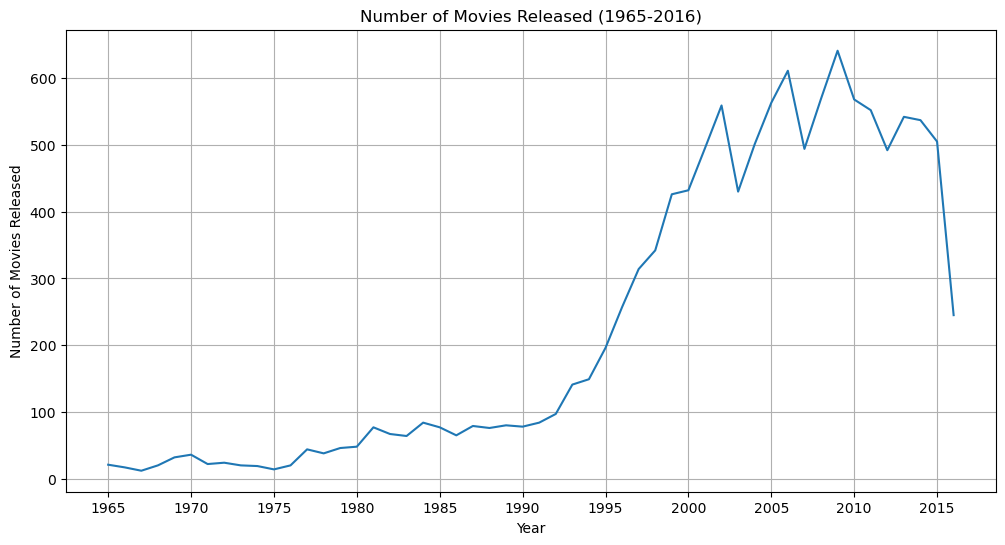

The year 2009 has highest number of movies released is: 641


,budget,popularity,revenue,runtime,vote_average,vote_count,year
count,1.192200e+04,11922.000000,1.192200e+04,11920.000000,11922.000000,11922.000000,11922.000000
mean,3.448338e+07,23.781562,9.665289e+07,107.367534,6.109856,782.150478,2003.294330
std,4.436220e+07,35.558059,1.808381e+08,21.475267,1.080484,1345.853459,9.649447
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1965.000000
25%,2.000000e+06,5.759545,0.000000e+00,94.000000,5.600000,72.000000,1999.000000
50%,1.900000e+07,14.653718,2.585422e+07,104.000000,6.200000,284.000000,2005.000000
75%,5.000000e+07,30.638249,1.095592e+08,118.000000,6.800000,841.000000,2010.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2016.000000


In [12]:
df = df.query('year >= 1965 and year < 2017')
yearly_movie_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_counts.index, yearly_movie_counts.values, linestyle='-')
plt.title('Number of Movies Released (1965-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(range(min(yearly_movie_counts.index), max(yearly_movie_counts.index), 5))
plt.grid(True)
plt.show()

highest_count_years = yearly_movie_counts.idxmax()
print(f'The year {highest_count_years} has highest number of movies released is: {yearly_movie_counts[highest_count_years]}')

df.describe()

### What properties (such as: budget, runtime, polularity) are associated with movies that have highest revenue?

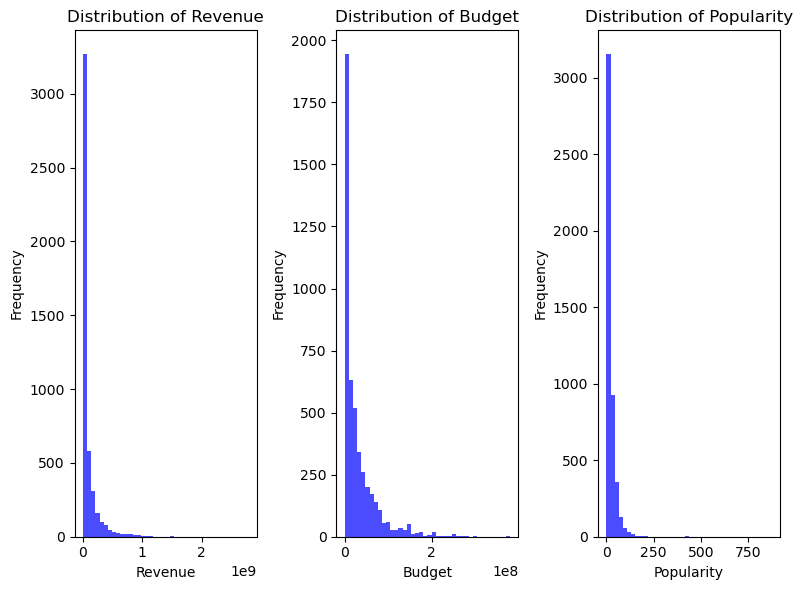

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
count,4.696000e+03,4696.000000,4696.000000,4.696000e+03,4694.000000,4696.000000,4696.000000,4696.000000
mean,2.961906e+07,57918.327939,21.625666,8.356679e+07,106.538986,6.072210,698.343910,2003.627129
std,4.097781e+07,89161.641898,32.035856,1.642820e+08,22.097957,1.190696,1245.141976,9.646313
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1965.000000
25%,7.950000e+05,9092.750000,4.798077,0.000000e+00,93.000000,5.600000,55.000000,1999.000000
50%,1.500000e+07,14740.500000,13.128186,1.978882e+07,103.000000,6.200000,239.000000,2006.000000
75%,4.000000e+07,60304.750000,28.459429,9.505252e+07,117.000000,6.800000,742.000000,2011.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2016.000000


In [69]:
### Univariate plots for the revenue, budget, and popularity variables
def create_hist_plot(ax, data, x_label, y_label, title, color='blue',bins=40, alpha=0.7):
    ax.hist(data,bins=bins,color=color,alpha=alpha)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
  
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(8, 6))

create_hist_plot(ax1,df['revenue'],'Revenue','Frequency','Distribution of Revenue')

create_hist_plot(ax2,df['budget'],'Budget','Frequency','Distribution of Budget')

create_hist_plot(ax3,df['popularity'],'Popularity','Frequency','Distribution of Popularity')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

df.describe()


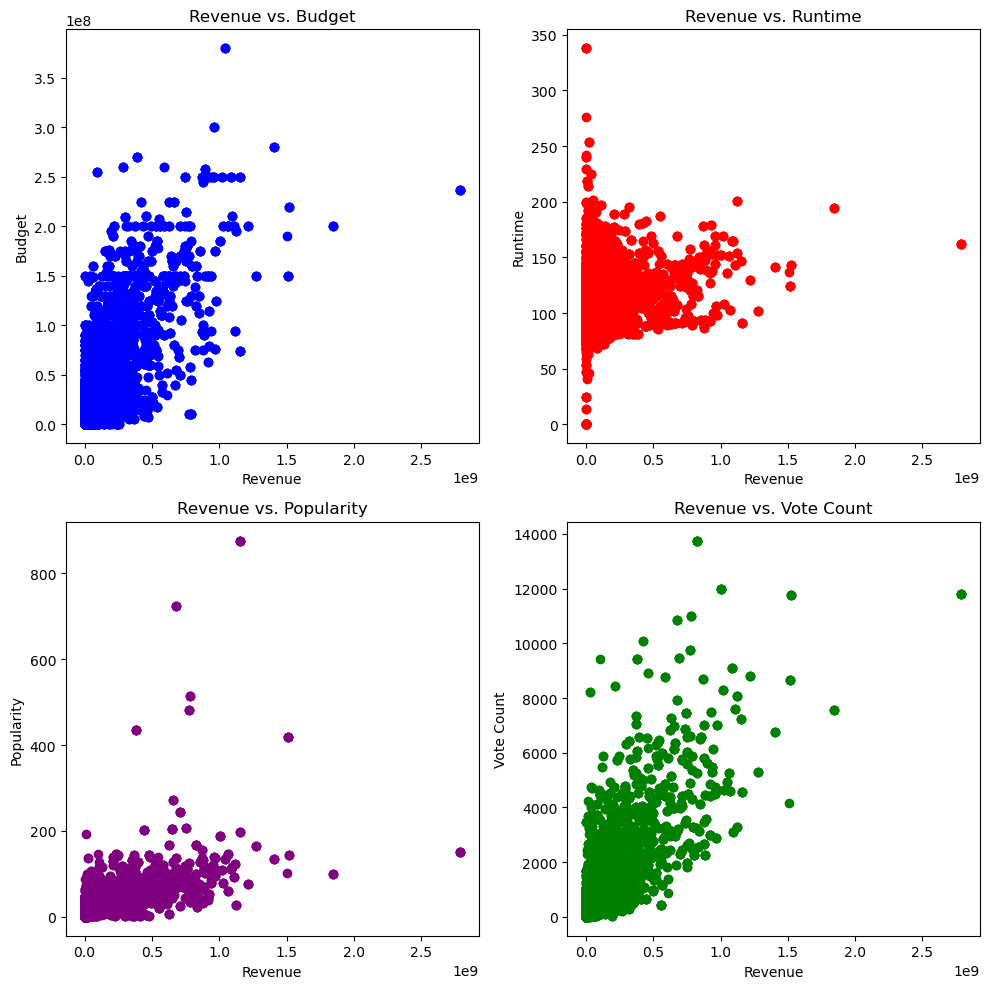

In [103]:
### Define function for create the same scatter plot
def create_scatter_plot(ax, x_data, y_data, x_label, y_label, title, color='blue'):
    ax.scatter(x_data, y_data, label='Data Points',color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

### Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
# Subplot 1: Revenue vs. Budget (Scatter Plot with Regression Line)
create_scatter_plot(ax1,df['revenue'], df['budget'],'Revenue','Budget','Revenue vs. Budget')

# Subplot 2: Revenue vs. Runtime (Scatter Plot)
create_scatter_plot(ax2,df['revenue'], df['runtime'],'Revenue','Runtime','Revenue vs. Runtime','red')

# Subplot 3: Revenue vs. Polularity (Scatter Plot)
create_scatter_plot(ax3,df['revenue'], df['popularity'],'Revenue','Popularity','Revenue vs. Popularity','purple')

# Subplot 3: Revenue vs. Vote Count (Scatter Plot)
create_scatter_plot(ax4,df['revenue'], df['vote_count'],'Revenue','Vote Count','Revenue vs. Vote Count','green')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [104]:
revenue_budget_corr = np.corrcoef(df['revenue'], df['budget'])[0, 1]

print("Correlation between revenue and budget:", revenue_budget_corr)

revenue_runtime_corr = np.corrcoef(df['revenue'], df['runtime'])[0, 1]

print("Correlation between revenue and runtime:", revenue_runtime_corr)

revenue_popularity_corr = np.corrcoef(df['revenue'], df['popularity'])[0, 1]

print("Correlation between revenue and popularity:", revenue_popularity_corr)

revenue_votecount_corr = np.corrcoef(df['revenue'], df['vote_count'])[0, 1]

print("Correlation between revenue and vote count:", revenue_votecount_corr)

Correlation between revenue and budget: 0.7307960069667061
Correlation between revenue and runtime: nan
Correlation between revenue and popularity: 0.6427139567910328
Correlation between revenue and vote count: 0.7923056739895336


**Revenue and Budget:**
- A correlation coefficient of 0.78 between revenue and budget might suggest that increasing your budget is associated with a substantial increase in revenue

**Revenue and Runtime:**
- A correlation coefficient of 0.26 between budget and runtime also indicates a relatively weak relationship between these two variables. 

**Revenue and Polularity:**
- Correlation: 0.67
- Movies that earn higher revenues are generally more popular.

**Revenue and Vote Count:**
- Correlation: 0.78
- Movies with higher revenues tend to receive a higher number of votes or ratings.

<a id='conclusions'></a>
## Conclusions

- Avatar is the most profitable movie, followed by Titanic and The Avengers
- Drama is the most popular genre with the highest number of movies released.
- The number of movies released is rapidly increasing from 1960 to 2015, with the highest number of movies released in 2009.But it seem the number descreased from 2015. 
- Movies with larger budgets tend to earn higher revenues.
- Movies with higher revenues tend to receive a higher number of votes or ratings and are generally more polpular.

### Limitations
- During data analysis proccess, I need to use the JSON data from genres, it might slow down the performance.
- The dataset has only one record in 2017, so I analyze data up to 2016 only.